<a href="https://colab.research.google.com/github/josedvelez1/Kaggle/blob/main/01_exploracio%CC%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración del dataset

## 1. Importando librerias

Antes de empezar es necesario importar las librerias con las que se podrá explorar los datos de archivo *train.csv*:
1. Numpy (importado con el alias np) es una libreria hecha para el ṕrocesamiento de matrices increiblemente rápida por estar hecha en C.
2. Pandas (importado con el alias pd) es una libreria genial para el procesamiento y análisis de datos.

In [ ]:
import numpy as np
import pandas as pd

## 2. Cargar el archivo

Para cargar los datos solo es necesario utilizar la libreria de pandas,
haciendo uso de su comando `pd.read_csv(<ruta_del_archivo>)`.


In [ ]:
students_df = pd.read_csv("/content/train.csv")
students_df

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...
670587,340018,20212,ADMINISTRACIÓN DE EMPRESAS,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Secundaria (Bachillerato) completa,Si,medio-bajo
670588,674299,20195,PSICOLOGIA,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Si,bajo
670589,135898,20183,CONTADURÍA PÚBLICA,BOLIVAR,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Educación profesional incompleta,Secundaria (Bachillerato) completa,No,medio-alto
670590,765948,20212,LICENCIATURA EN HISTORIA,VALLE,No pagó matrícula,0,Estrato 2,Si,Primaria incompleta,Secundaria (Bachillerato) incompleta,Si,medio-alto


## 3. Exploración inicial de los datos

Para demostrar el debido uso de pandas, se recolectará una serie de datos procesando el contenido ya cargado del archivo *train.csv*.

### 3.1 Obteniendo Columnas

Antes de empezar con los ejemplos, extraeremos las columnas existentes para saber qué datos podemos analizar.

In [ ]:
student_data_columns = students_df.columns.tolist()
for index, column in enumerate(student_data_columns):
    print(index + 1,". ", column, sep="")

1. ID
2. PERIODO
3. ESTU_PRGM_ACADEMICO
4. ESTU_PRGM_DEPARTAMENTO
5. ESTU_VALORMATRICULAUNIVERSIDAD
6. ESTU_HORASSEMANATRABAJA
7. FAMI_ESTRATOVIVIENDA
8. FAMI_TIENEINTERNET
9. FAMI_EDUCACIONPADRE
10. FAMI_EDUCACIONMADRE
11. ESTU_PAGOMATRICULAPROPIO
12. RENDIMIENTO_GLOBAL


Podemos ver que hay 12 columnas con las cuales vamos a jugar,
para los 6 ejemplos nos basaremos en las siguientes 6 preguntas:
1. ¿Cuántos estudiantes pagan una matricula entre 500 mil y menos de 1 millón?
2. ¿Cuántos pregrados diferentes existen?
3. ¿Cuál es la proporción de estudiantes que tienen un rendimiento bajo?
4. ¿Cuántos estudiantes trabajan más de 30 horas semanales?
5. ¿Cuál es la cantidad de estudiantes que tienen internet?

### 3.2 ¿Cuántos estudiantes pagan una matricula entre 500 mil y 1 millón?

Para calcular esto primero agruparemos los datos en base a la columna `ESTU_VALORMATRICULAUNIVERSIDAD` y luego elegimos el resultado

In [ ]:
# Agrupar los datos por valor de matricula
student_enroll_value = students_df\
    .groupby(["ESTU_VALORMATRICULAUNIVERSIDAD"])["ESTU_VALORMATRICULAUNIVERSIDAD"]\
    .count()\
    .to_frame()\
    .rename(columns={"ESTU_VALORMATRICULAUNIVERSIDAD":"Estudiantes"})

print(
    "Hay",
    student_enroll_value["Estudiantes"]["Entre 500 mil y menos de 1 millón"],
    "estudiantes que pagan entre 500 mil y menos de 1 millón",
)

Hay 76164 estudiantes que pagan entre 500 mil y menos de 1 millón


### 3.3 ¿Cuántas carreras hay registradas en el dataset?

In [ ]:
student_pregrade_count = students_df\
    .groupby(["ESTU_PRGM_ACADEMICO"])["ESTU_PRGM_ACADEMICO"]\
    .count()\
    .to_frame()\
    .index\
    .size

print(f"En el archivo hay {student_pregrade_count} carreras registradas en el dataset."
)

En el archivo hay 947 carreras registradas en el dataset.


### 3.4 ¿Cuál es la proporción de estudiantes tienen un rendimiento bajo?

In [ ]:
students_performance = students_df\
    .groupby(["RENDIMIENTO_GLOBAL"])["RENDIMIENTO_GLOBAL"]\
    .count()\

total_students = 0
for val in students_performance: total_students += val
low_performance = round(students_performance["bajo"]/total_students,4)*100
print("El porcentaje de estudiantes con bajo nivel es de un ", low_performance, "%", sep="")
students_performance.to_frame()

El porcentaje de estudiantes con bajo nivel es de un 24.97%


,RENDIMIENTO_GLOBAL
RENDIMIENTO_GLOBAL,
alto,170053
bajo,167459
medio-alto,166142
medio-bajo,166937


### 3.5 ¿Cuántos estudiantes trabajan más de 30 horas semanales?

In [ ]:
working_filter = students_df["ESTU_HORASSEMANATRABAJA"] == "Más de 30 horas"
working_students = students_df[working_filter].shape[0]
print("Hay", working_students, "estudiantes que deben trabajar más de 30 horas")

Hay 241552 estudiantes que deben trabajar más de 30 horas


### 3.6 ¿Cuál es la cantidad de estudiantes que tienen internet?

,count
FAMI_TIENEINTERNET,
Si,573830
No,71000


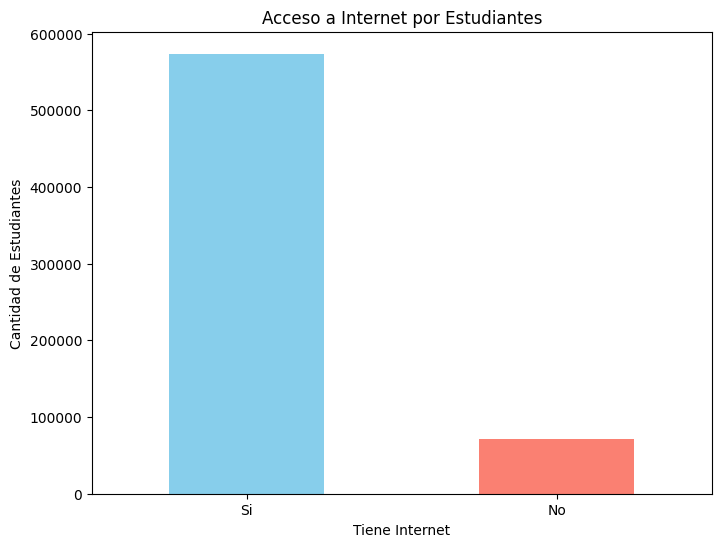

In [ ]:
internet_counts = students_df['FAMI_TIENEINTERNET'].value_counts()

internet_plot = internet_counts.plot(
    kind='bar',
    rot=0,
    figsize=(8, 6),
    color=['skyblue', 'salmon']
)

internet_plot.set_title("Acceso a Internet por Estudiantes")
internet_plot.set_ylabel("Cantidad de Estudiantes")
internet_plot.set_xlabel("Tiene Internet")

internet_counts